**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [16]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

random_state = 42

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [18]:
# mnist_dataset = fetch_openml('mnist_784', version=1, data_home='')
digits_dataset = datasets.load_digits()

n = len(digits_dataset['images'])
X, y = digits_dataset['images'].reshape(n, -1), digits_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

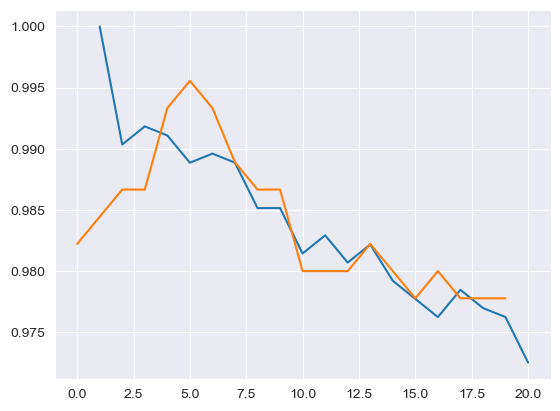

In [19]:
results_test = []
results_train = []


def fit_pred_score(k_neighbors, X_dataset_to_pred, y_dataset_to_pred, metric="minkowski"):
    model_KNN = KNeighborsClassifier(n_neighbors=k_neighbors, metric=metric)
    model_KNN.fit(X_train, y_train)

    y_pred = model_KNN.predict(X_dataset_to_pred)
    score = accuracy_score(y_dataset_to_pred, y_pred)
    return score


for k in range(1, 21):
    results_train.append(fit_pred_score(k, X_train, y_train))
    results_test.append(fit_pred_score(k, X_test, y_test))

plt.plot(range(1, 21), results_train, results_test, label='KNN');

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** ...: По определению, модель буквально запомнила класс, к которому точка принадлежит и ничего не считает. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

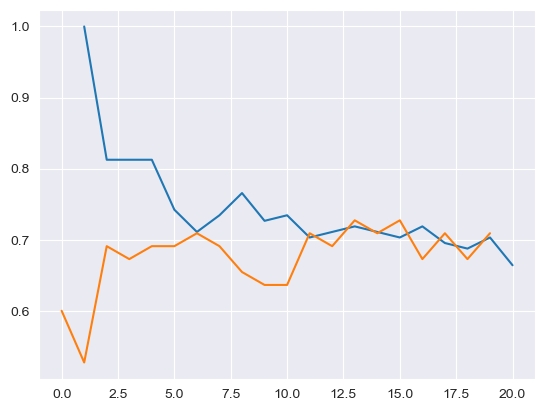

In [37]:
results_test = []
results_train = []

for k in range(1, 21):
    results_train.append(fit_pred_score(k, X_train, y_train, metric="l1"))
    results_test.append(fit_pred_score(k, X_test, y_test, metric="l1"))

plt.plot(range(1, 21), results_train, results_test, label='KNN');

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:**
Раньше: Векторы небольшой длины, а l1 метрика слишком слабо "наказывает" за ошибки, что приводит к общему падению скора. По сути, смена метрики очень важна, мы пересчитываем расстояния между соседними элементами по-другому, в некоторых задачах некоторые метрики могут быть совершенно некорректны, поэтому лучше всего выбирать метрику основываясь на теоретических знаниях, соответствующей поставленной задаче.

---------------------------
Исправлено:
При смене метрики меняется «геометрия» пространства, и, следовательно, набор ближайших соседей. В случае MNIST, где данные достаточно высокомерные, метрика
L1(Манхэттена) по-другому «взвешивает» различия между пикселями по сравнению с евклидовой метрикой. В результате при одном и том же
k модель видит иной круг ближайших точек, и это существенно влияет на качество классификации и форму кривых точности на графике.

**Выводы:** Подбор гиперпараметров с умом это важно, от них в значительной мере может зависеть качество модели. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [23]:
titanic = pd.read_csv("../data/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [24]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак
titanic = titanic.dropna()
X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [25]:
print(len(X[X.isna()]))
X = X.dropna()
y = y.dropna()

183


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [26]:
train_test_len_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_test_len_ratio, random_state=random_state)
X_train

,Pclass,Age,Sex,SibSp,Parch,Fare
820,1,52.0,female,1,1,93.500
741,1,36.0,male,1,0,78.850
435,1,14.0,female,1,2,120.000
789,1,46.0,male,0,0,79.200
151,1,22.0,female,1,0,66.600
...,...,...,...,...,...,...
520,1,30.0,female,0,0,93.500
92,1,46.0,male,1,0,61.175
460,1,48.0,male,0,0,26.550
872,1,33.0,male,0,0,5.000


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

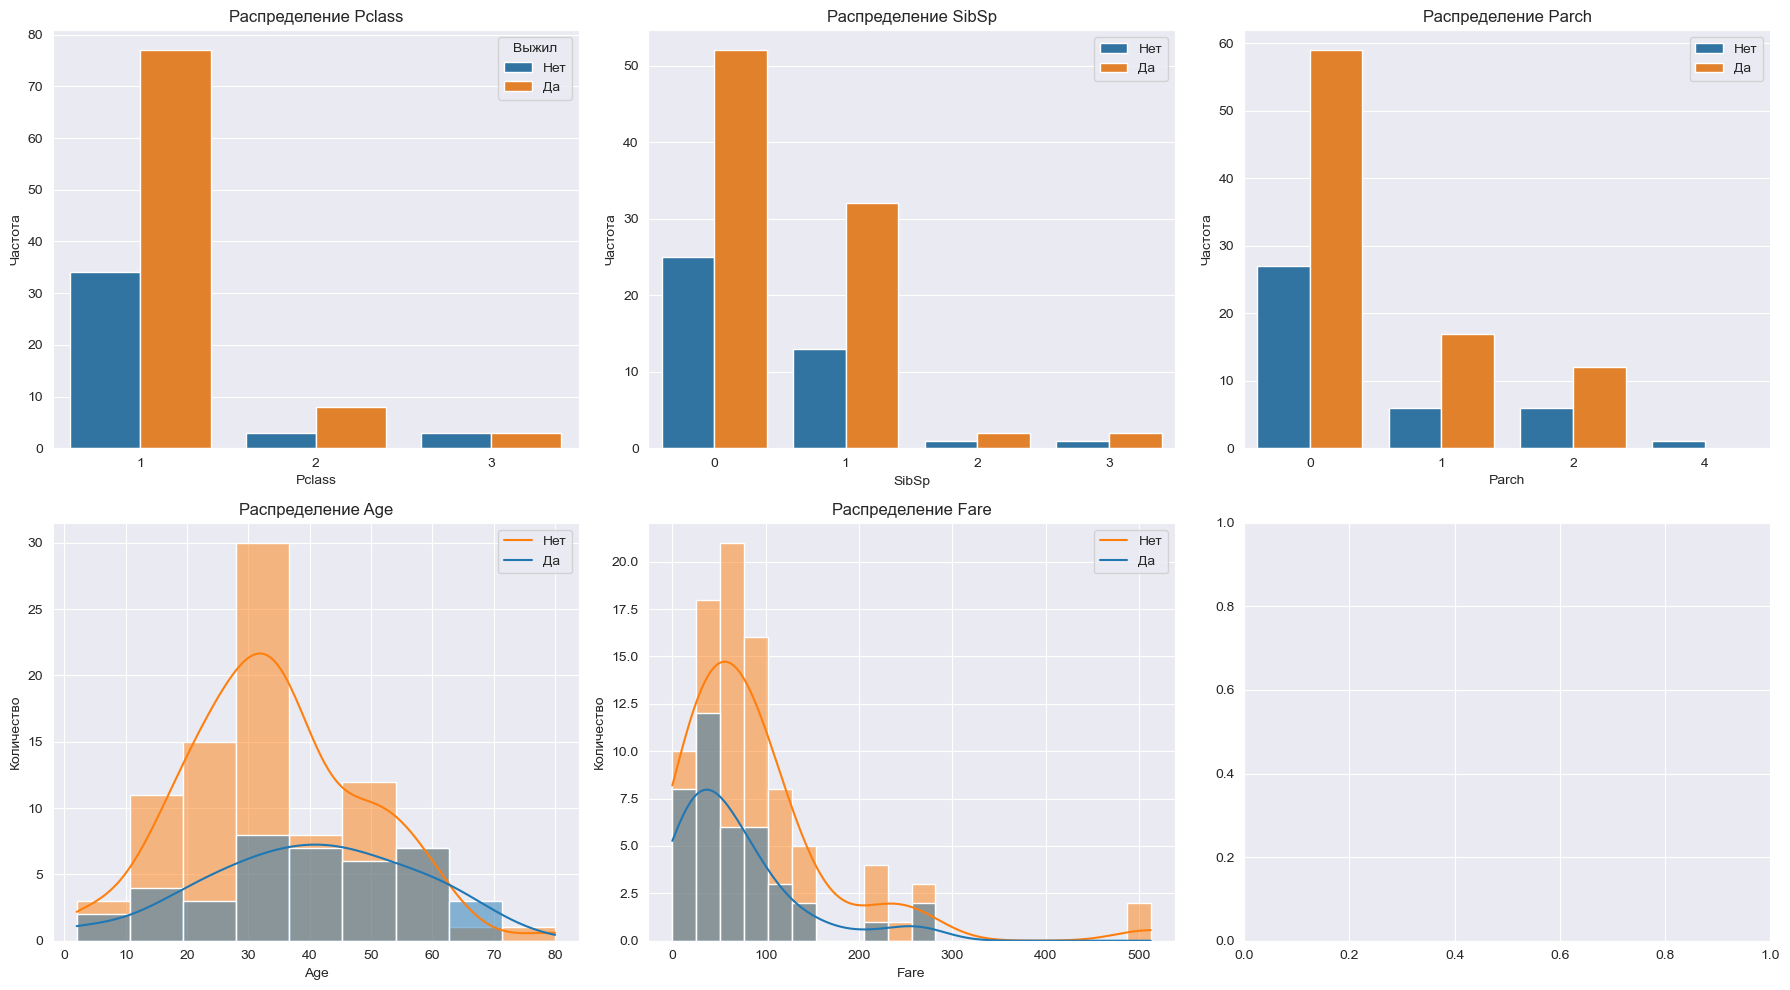

In [41]:
train_df = pd.concat([X_train, y_train], axis=1)

# Предположим, что среди признаков есть категориальные и числовые
cat_features = ['Pclass', 'SibSp', 'Parch']  # пример
num_features = ['Age', 'Fare']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Чтобы обращаться к ним как к списку

for i, feature in enumerate(cat_features + num_features):
    ax = axes[i]
    if feature in cat_features:
        # Для категориальных признаков удобнее countplot
        sns.countplot(data=train_df, x=feature, hue='Survived', ax=ax)
        ax.set_title(f'Распределение {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Частота')
    else:
        # Для числовых признаков используем гистограмму
        sns.histplot(data=train_df, x=feature, hue='Survived', kde=True, ax=ax)
        ax.set_title(f'Распределение {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Количество')

    ax.legend(title='Выжил' if i == 0 else '', labels=['Нет', 'Да'])

plt.tight_layout()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**


    """
    Функция принимает DataFrame X (например, X_train) и возвращает pd.Series с предсказаниями
    по правилу:
        - Если Pclass == 1 -> "Выжил"
        - Иначе, если Parch == 0 -> "Выжил"
        - Иначе -> "Не выжил"
    """


 

**Дерево 2:**

    """
    Функция принимает DataFrame X (например, X_train) и возвращает pd.Series с предсказаниями
    по правилу:
        - Если SibSp < 2 -> "Выжил"
        - Иначе -> "Не выжил"
    """

Реализуйте полученные деревья по шаблону

In [28]:
def predict_tree1(X):
    """
    Функция принимает DataFrame X (например, X_train) и возвращает pd.Series с предсказаниями
    по правилу:
        - Если Pclass == 1 -> "Выжил"
        - Иначе, если Parch == 0 -> "Выжил"
        - Иначе -> "Не выжил"
    """
    predictions = np.where(
        X['Pclass'] == 1,
        1,
        np.where(X['Parch'] == 0, 1, 0)
    )
    return pd.Series(predictions, index=X.index)

def predict_tree2(X):
    """
    Функция принимает DataFrame X (например, X_train) и возвращает pd.Series с предсказаниями
    по правилу:
        - Если SibSp < 2 -> "Выжил"
        - Иначе -> "Не выжил"
    """
    predictions = np.where(
        X['SibSp'] < 2,
        1,
        0
    )
    return pd.Series(predictions, index=X.index)


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [29]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    return accuracy_score(y_true=target, y_pred=predicted)

In [30]:
print(accuracy(predicted=predict_tree1(X_test), target=y_test), accuracy(predicted=predict_tree2(X_test), target=y_test))

0.5818181818181818 0.5818181818181818


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:**
Раньше: вектор SipSp является очень разряженным, то есть там много нулей, а то, равно двойке и тройке может быть "выбросами", поэтому информативность для kNN может оказаться нулевая, и точность не то что вырастет, а даже может упасть. Parch: по сути, то же самое. Pclass вообще является категориальным признаком, поэтому тоже может давать смещенные результаты

----------------------------
Исправлено: Проблема с признаками SibSp и Parch заключается в том, что их значения имеют крайне сжатое распределение – большинство пассажиров имеет 0 или 1 родственника на борту, а редкие высокие значения могут выступать как выбросы. Это приводит к тому, что без надлежащей нормировки они либо почти не влияют на расчет расстояний, либо искажают их, поскольку разница между, например, 0 и 1 может быть не столь информативной в контексте общей классификации.
В отличие от них, Pclass хоть и является категориальным признаком, но имеет упорядоченную природу и более сбалансированное распределение (значения 1, 2, 3), что делает его более информативным для разделения классов при использовании kNN. Таким образом, проблемы масштабирования и влияния выбросов более актуальны для SibSp и Parch, чем для Pclass.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [31]:
bal_features = ['Pclass', 'Age', 'Sex','Fare']
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
X_train["Sex"] = X_train["Sex"].str.strip().str.lower().apply(lambda x: 1 if x == "female" else 0)
X_test["Sex"] = X_test["Sex"].str.strip().str.lower().apply(lambda x: 1 if x == "female" else 0)
model.fit(X_train[bal_features], y_train)
model.score(X_test[bal_features], y_test)

0.6545454545454545

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [32]:
for feature in features_columns:
    print(f"Feature: {feature}. Min: {X_train[feature].min()}. Max: {X_train[feature].max()}")

Feature: Pclass. Min: 1. Max: 3
Feature: Age. Min: 2.0. Max: 80.0
Feature: Sex. Min: 0. Max: 1
Feature: SibSp. Min: 0. Max: 3
Feature: Parch. Min: 0. Max: 4
Feature: Fare. Min: 0.0. Max: 512.3292


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  Для метода ближайших соседей важно, чтобы все представители классов лежали достаточно плотно, чтобы добиться максимальной точности. Если данные будут разряжены, пересекаться и будут образовывать слабо выраженную разделяющую плоскость, то точность может значительно падать. 

Также важно, чтобы значения классов были сбалансированы, иначе точность также может и значительно упасть.


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Потеря информации и чувствительность к выбросам: даже если почти все значения распределены примерно равномерно, то при наличии выброса в виде очень маленького минимума/большого максимума, результат может отличаться от ожидаемого. 


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [43]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(X_train[bal_features])

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [44]:
[f"feature {bal_features[col_num]}. min: {scaled_data[:, col_num].min()}, max: {scaled_data[:, col_num].max()}" for col_num in range(scaled_data.shape[1])]

['feature Pclass. min: 0.0, max: 1.0',
 'feature Age. min: 0.0, max: 0.9999999999999999',
 'feature Sex. min: 0.0, max: 1.0',
 'feature Fare. min: 0.0, max: 1.0']

Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [45]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
model.fit(scaled_data, y_train)

model.score(scaler.transform(X_test[bal_features]), y_test)

0.7272727272727273

**Вывод:** KNN работает лучше с отнормированными данными, несмотря даже на то, что нормировка - минимакс

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

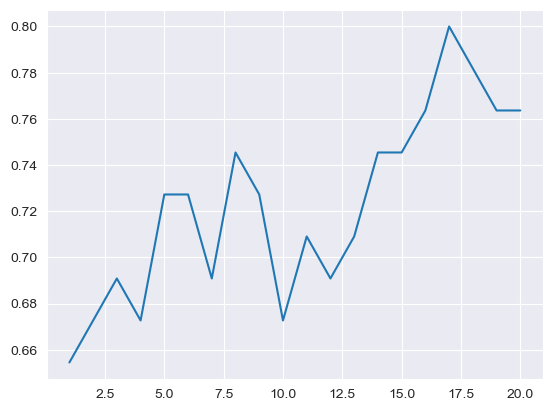

In [46]:
scores = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    model.fit(scaled_data, y_train)
    scores.append(model.score(scaler.fit_transform(X_test[bal_features]), y_test))
    
plt.plot(range(1, 21), scores);

**Вывод:** При k = 17 модель на нормированных данных имеет наилучшую точность: около 80%, что сильно лучше околослучайного результата на самописных решающих деревьях: ~57%